In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('AAPL.csv')
data.head(10)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
5,5,AAPL,2015-06-03 00:00:00+00:00,130.120,130.940,129.90,130.66,30983542,119.908625,120.664274,119.705890,120.406248,30983542,0.0,1.0
6,6,AAPL,2015-06-04 00:00:00+00:00,129.360,130.580,128.91,129.58,38450118,119.208267,120.332526,118.793582,119.411002,38450118,0.0,1.0
7,7,AAPL,2015-06-05 00:00:00+00:00,128.650,129.690,128.36,129.50,35626800,118.553986,119.512370,118.286744,119.337280,35626800,0.0,1.0
8,8,AAPL,2015-06-08 00:00:00+00:00,127.800,129.210,126.83,128.90,52674786,117.770691,119.070039,116.876813,118.784366,52674786,0.0,1.0
9,9,AAPL,2015-06-09 00:00:00+00:00,127.420,128.080,125.62,126.70,56075420,117.420512,118.028717,115.761770,116.757015,56075420,0.0,1.0


In [3]:
data.shape

(1258, 15)

In [4]:
data.dtypes

Unnamed: 0       int64
symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object

In [5]:
data['date'] = pd.to_datetime(data['date'])

In [6]:
data = data.drop(['symbol','Unnamed: 0','splitFactor', 'divCash'],axis=1)

In [7]:
data.isnull().sum()

date         0
close        0
high         0
low          0
open         0
volume       0
adjClose     0
adjHigh      0
adjLow       0
adjOpen      0
adjVolume    0
dtype: int64

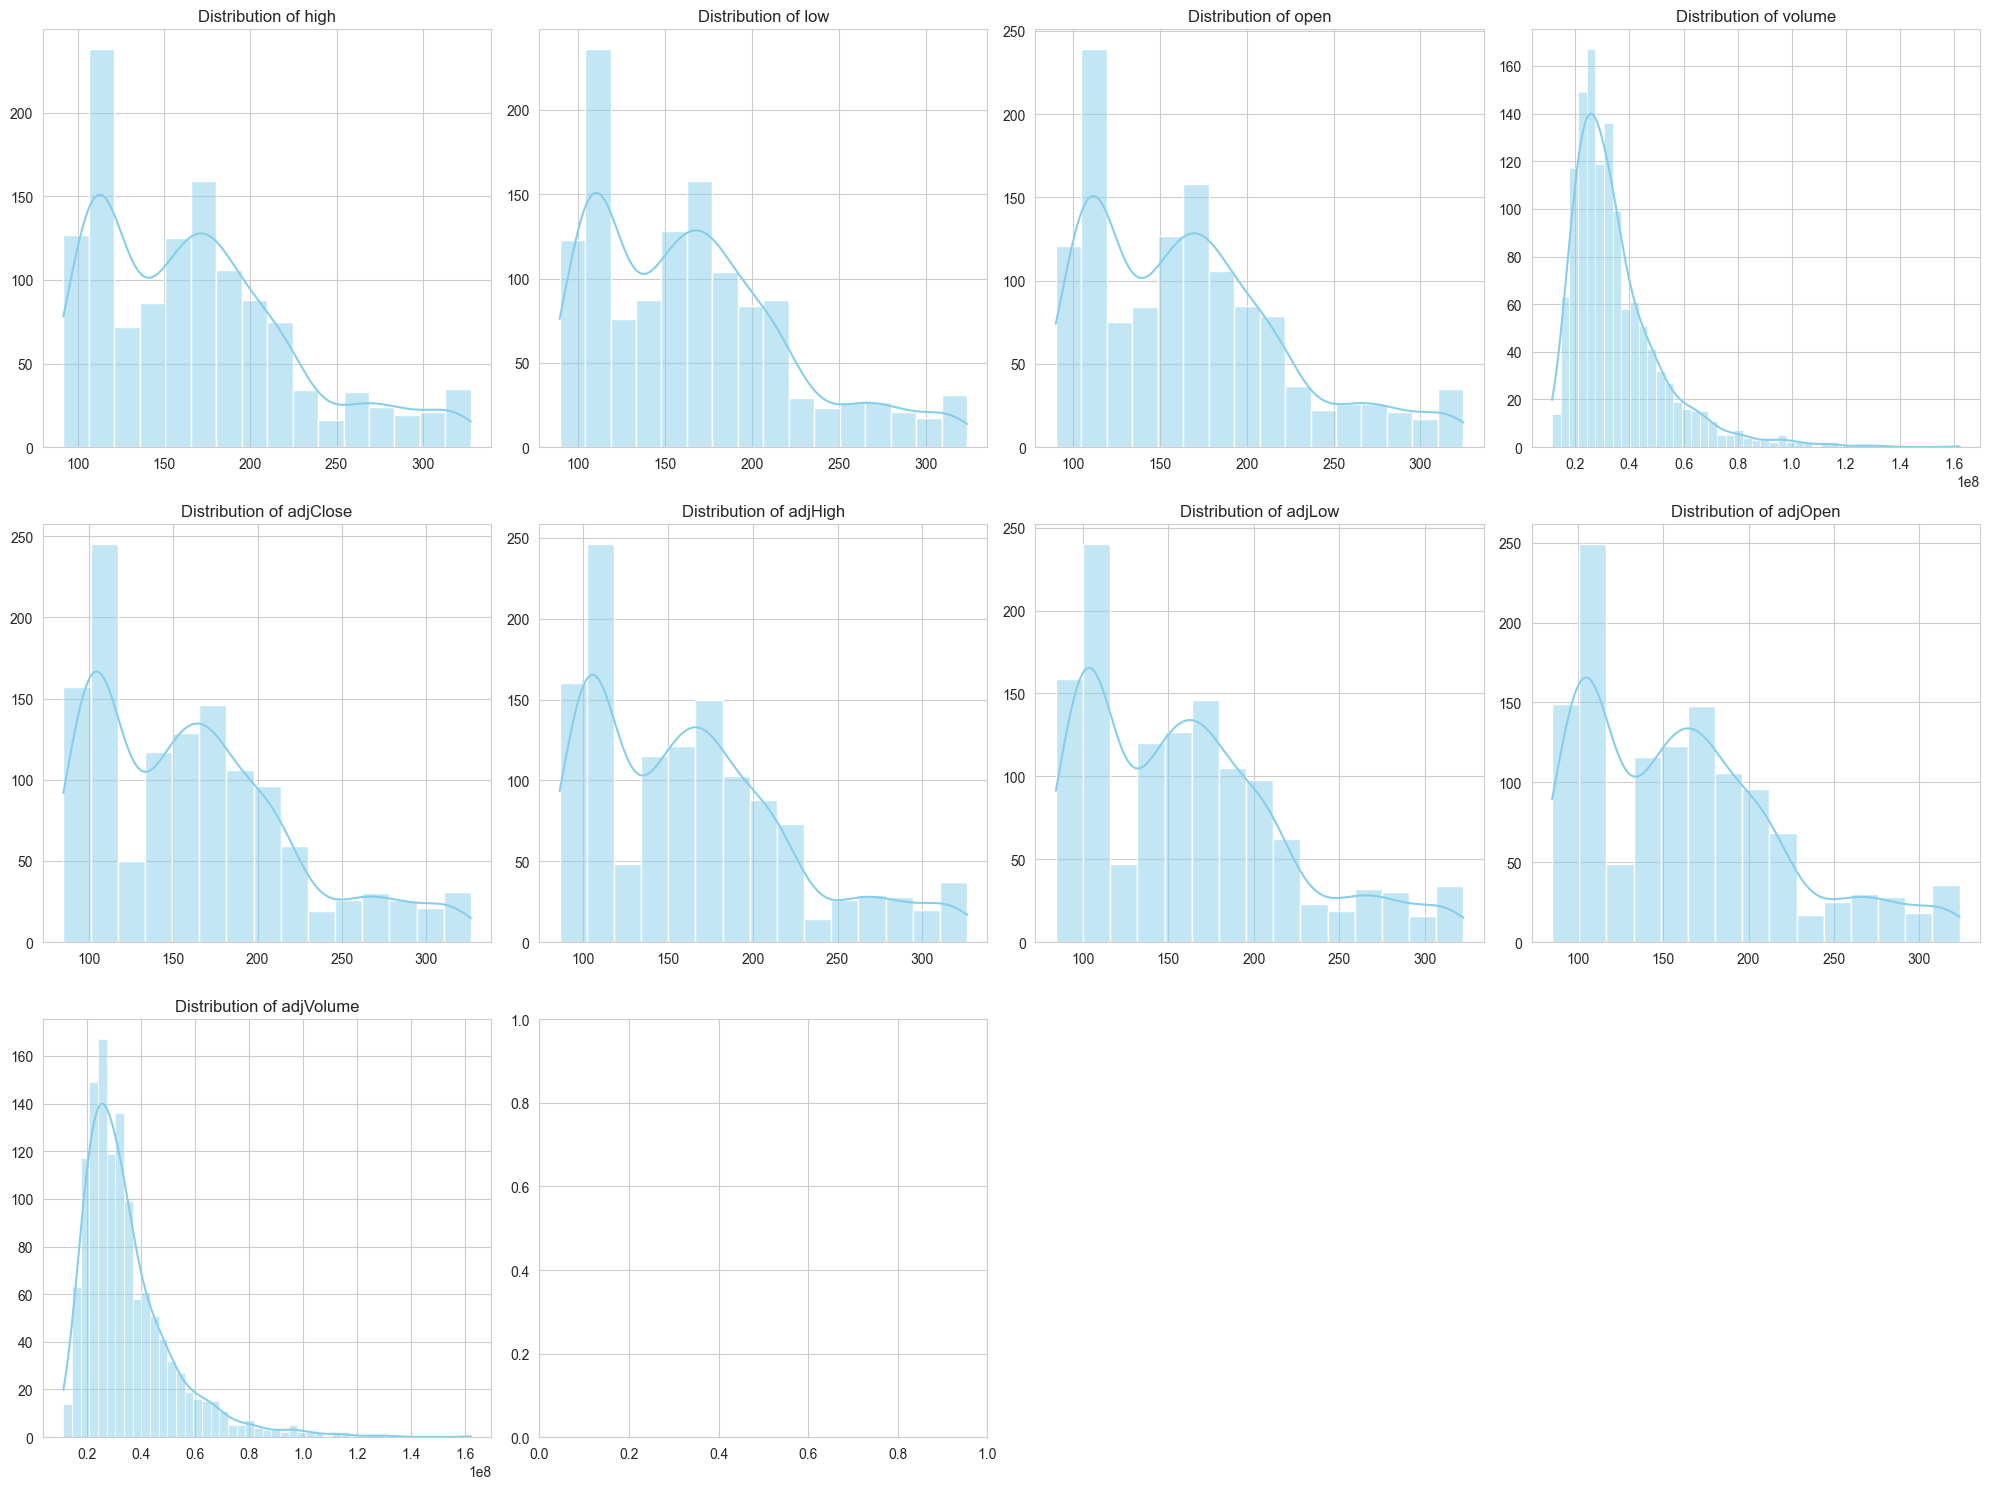

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

num_cols = 4 
num_rows = (len(data.columns) - 2) // num_cols + 1 


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(data.columns[2:]):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data[column], kde=True, ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'Distribution of {column}', fontsize=12)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

for i in range(len(data.columns[1:]), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()



In [ ]:
for i in data.columns:
    plt.figure(figsize = (10,2))
    sns.boxplot(x = data[i])
    plt.show()

In [9]:
df_not_date = data.drop(["date"], axis=1)
df_not_date.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246
1,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309
2,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452
3,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797
4,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627


In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(np.array(df_not_date).reshape(-1,1))

In [14]:
data.shape

(1258, 11)

In [16]:
data

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246
1,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309
2,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452
3,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797
4,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627
...,...,...,...,...,...,...,...,...,...,...,...
1253,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125
1254,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385
1255,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215
1256,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211


In [15]:
data_scaled

array([[2.95357277e-07],
       [2.96682750e-07],
       [2.83058118e-07],
       ...,
       [1.42543117e-06],
       [1.42802046e-06],
       [1.26078219e-01]])

In [12]:
train_size = int(len(data_scaled) * 0.65)
val_size = int(len(data_scaled) * 0.15)

train_data, temp = data_scaled[0:train_size, :], data_scaled[train_size:len(data_scaled), :]

test_size = len(temp) - val_size
test_data, val_data = temp[0:test_size, :], temp[test_size:len(temp), :]

print("Dimenzije train_data:", train_data.shape)
print("Dimenzije test_data:", test_data.shape)
print("Dimenzije val_data:", val_data.shape)

Dimenzije train_data: (8177, 1)
Dimenzije test_data: (2516, 1)
Dimenzije val_data: (1887, 1)


In [13]:
train_size

8177

In [17]:
def create_ds(dataset,time_steps):   #Time Steps is how many previous records considered to predict the current record
    data_x,data_y = [],[]
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps),0]
        data_x.append(a)
        b = dataset[i+time_steps,0]
        data_y.append(b)
    return np.array(data_x),np.array(data_y)

In [18]:
time_step = 100
X_train, y_train = create_ds(train_data, time_step)
X_test, y_test = create_ds(test_data, time_step)
X_valid, y_valid = create_ds(val_data, time_step)


In [19]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_valid = X_valid.reshape(X_valid.shape[0],X_valid.shape[1] , 1)

In [20]:
X_train.shape

(8076, 100, 1)

In [21]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [22]:
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    'best_model.keras', monitor='val_loss', save_best_only=True)

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

# Ovde treba da se navedu sve mere
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
def plot_train_history(history):
    plt.figure(figsize=(15, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [26]:
all_results = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'R2', 'MSE'])

In [27]:
import sklearn.metrics as metrics

def test_model(model, model_name, X_test, y_test, end=-1):
    X_test = X_test[:end]
    y_test = y_test[:end]
    y_pred = model.predict(X_test).flatten()
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mae = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    all_results.loc[len(all_results)] = [model_name, rmse, mae, r2, mse]

    plt.figure(figsize=(15, 6))
    plt.plot(y_test, label='True')
    plt.plot(y_pred, label='Predicted')
    plt.title(f'{model_name} Predictions')
    plt.legend()
    plt.show()

    display(all_results[-1:])

    # mean square error
    # mean absolute error
    # r2 score
    # root mean squared error
    # mean_absolute_percentage_error
    # mean_squared_log_error

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Ovde treba da se navedu sve mere
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - loss: 0.0103 - val_loss: 0.0027
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - loss: 0.0050 - val_loss: 0.0021
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - loss: 0.0045 - val_loss: 0.0021
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - loss: 0.0022 - val_loss: 6.3858e-04
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - loss: 0.0017 - val_loss: 5.7792e-04
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - loss: 0.0013 - val_loss: 5.1521e-04
Epoch 8/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - loss: 0.0012 - val_loss: 4.9181e-04
Epoch 9/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 0.0012 - val_loss: 4.4152e-04
Epoch 10/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - loss: 0.0011 - val_loss: 4.7344e-04


In [ ]:
from keras.models import load_model
plot_train_history(history)
best_model = load_model('best_model.keras')
test_model(best_model, 'LSTM , Adam 0.001, LOSS MSE',
           X_test, y_test, 200)

In [ ]:
from keras.layers import SimpleRNN

model_sequential = Sequential()
model_sequential.add(SimpleRNN(50, input_shape=(100, 1)))
model_sequential.add(Dense(1))
model_sequential.compile(loss='mean_squared_error', optimizer='adam')
model_sequential.summary()


In [ ]:
history = model_sequential.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

In [ ]:
plot_train_history(history)
best_model = load_model('best_model.keras')
test_model(model_sequential, 'Simple RNN',
           X_test, y_test, 200)

In [ ]:
model_reccurent = Sequential()
model_reccurent.add(SimpleRNN(50, return_sequences=True, input_shape=(100, 1)))  # Prvi sloj RNN s povratnim sekvencama
model_reccurent.add(SimpleRNN(50, return_sequences=True))  # Drugi sloj RNN s povratnim sekvencama
model_reccurent.add(SimpleRNN(50))  # Treći sloj RNN bez povratnih sekvenci
model_reccurent.add(Dense(1))
model_reccurent.compile(loss='mean_squared_error', optimizer='adam')
model_reccurent.summary()


In [ ]:
history_reccurent = model_reccurent.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

In [ ]:
plot_train_history(history_reccurent)
best_model = load_model('best_model.keras')
test_model(model_reccurent, 'Simple RNN',
           X_test, y_test, 200)

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(100, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.summary()


In [ ]:
history_lstm = model_lstm.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

In [ ]:
plot_train_history(history_lstm)
best_model = load_model('best_model.keras')
test_model(model_lstm, 'Simple RNN',
           X_test, y_test, 200)

In [ ]:
model_multiple_lstm = Sequential()
model_multiple_lstm.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model_multiple_lstm.add(LSTM(50))
model_multiple_lstm.add(Dense(1))
model_multiple_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_multiple_lstm.summary()


In [ ]:
history_multiple_lstm = model_multiple_lstm.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

In [ ]:
plot_train_history(history_multiple_lstm)
best_model = load_model('best_model.keras')
test_model(model_multiple_lstm, 'Multiple LSTM',
           X_test, y_test, 200)

In [ ]:
model_lstm_dropout = Sequential()
model_lstm_dropout.add(LSTM(50, input_shape=(100, 1)))
model_lstm_dropout.add(Dropout(0.2))
model_lstm_dropout.add(Dense(1))
model_lstm_dropout.compile(loss='mean_squared_error', optimizer='adam')
model_lstm_dropout.summary()


In [ ]:
history_lstm_dropout = model_lstm_dropout.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

In [ ]:
plot_train_history(history_lstm_dropout)
best_model = load_model('best_model.keras')
test_model(model_lstm_dropout, 'Multiple LSTM',
           X_test, y_test, 200)

In [ ]:
model_multiple_lstm_dropout = Sequential()
model_multiple_lstm_dropout.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model_multiple_lstm_dropout.add(Dropout(0.2))
model_multiple_lstm_dropout.add(LSTM(50, return_sequences=True))
model_multiple_lstm_dropout.add(Dropout(0.2))
model_multiple_lstm_dropout.add(LSTM(50))
model_multiple_lstm_dropout.add(Dropout(0.2))
model_multiple_lstm_dropout.add(Dense(1))
model_multiple_lstm_dropout.compile(loss='mean_squared_error', optimizer='adam')
model_multiple_lstm_dropout.summary()


In [ ]:
history_multiple_lstm_dropout = model_multiple_lstm_dropout.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

In [ ]:
plot_train_history(history_multiple_lstm_dropout)
best_model = load_model('best_model.keras')
test_model(model_multiple_lstm_dropout, 'Multiple LSTM',
           X_test, y_test, 200)

In [ ]:
from keras.layers import GRU

model_lstm_gru = Sequential()
model_lstm_gru.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model_lstm_gru.add(GRU(50, return_sequences=True))
model_lstm_gru.add(LSTM(50))
model_lstm_gru.add(Dense(1))
model_lstm_gru.compile(loss='mean_squared_error', optimizer='adam')
model_lstm_gru.summary()


In [ ]:
history_lstm_gru = model_lstm_gru.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

In [ ]:
plot_train_history(history_lstm_gru)
best_model = load_model('best_model.keras')
test_model(model_lstm_gru, 'Multiple LSTM',
           X_test, y_test, 200)

In [ ]:
all_results.sort_values(by='MSE')

In [ ]:
from keras.layers import Bidirectional

model_bidirectional = Sequential()
model_bidirectional.add(Bidirectional(LSTM(50, input_shape=(100, 1))))
model_bidirectional.add(Dense(1))
model_bidirectional.compile(loss='mean_squared_error', optimizer='adam')
model_bidirectional.summary()


In [ ]:
history_bidirectional = model_bidirectional.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

In [ ]:
plot_train_history(history_bidirectional)
best_model = load_model('best_model.keras')
test_model(model_bidirectional, 'Bidirectional LSTM',
           X_test, y_test, 200)

In [ ]:
from keras.layers import Conv1D, MaxPooling1D

model_conv_rnn = Sequential()
model_conv_rnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model_conv_rnn.add(MaxPooling1D(pool_size=2))
model_conv_rnn.add(LSTM(50))
model_conv_rnn.add(Dense(1))
model_conv_rnn.compile(loss='mean_squared_error', optimizer='adam')
model_conv_rnn.summary()


In [ ]:
history_conv_rnn = model_conv_rnn.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

In [ ]:
plot_train_history(history_conv_rnn)
best_model = load_model('best_model.keras')
test_model(model_conv_rnn, 'Conv Rnn',
           X_test, y_test, 200)

In [ ]:
model_deep = Sequential()
model_deep.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model_deep.add(MaxPooling1D(pool_size=2))
model_deep.add(LSTM(50, return_sequences=True))
model_deep.add(Dropout(0.2))
model_deep.add(LSTM(50))
model_deep.add(Dense(1))
model_deep.compile(loss='mean_squared_error', optimizer='adam')
model_deep.summary()


In [ ]:
history_deep = model_deep.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

In [ ]:
plot_train_history(history_deep)
best_model = load_model('best_model.keras')
test_model(model_deep, 'Conv Rnn',
           X_test, y_test, 200)